# Práctica 3: Resolución Numérica  de PVIs  usando Python

Autor de esta versión: **Juan Antonio Villegas**

Autor de la primera versión: Pedro González Rodelas

Fecha de la primera versión: 01/05/2020

Sucesivas revisiones: 02-08 y 11/05/2020, 02/06/2021

Fecha de la última revisión: 15/5/2025

En esta práctica se programan en lenguaje Python diferentes métodos numéricos de resolución aproximada de Problemas de Valores Iniciales asociados a Ecuaciones Diferenciales Ordinarias (EDOs) y sistemas de primer orden, provenientes muchos de ellos de problemas y aplicaciones interesantes de Física e Ingeniería.

Algunos de los ejemplos y algoritmos usados en este notebook han sido extraídos, adaptados o traducidos por Pedro González Rodelas de alguno de los siguientes libros y/o apuntes:


- "Análisis Numérico con Mathematica" de V. Ramírez, D. Barrera, M. Pasadas y P. González. Edit. Ariel Ciencia (2001) con ISBN: 84-344-8036-0. Dep. Legal: B.31.425-2001.

- Apuntes de la asignatura de Métodos Numéricos II del Grado de Matemáticas y Dobles Grados de Matemáticas e Informática o Física de la UGR, de los profesores José Martínez Aroza y Victoriano Ramírez González.

- Notebook perteneciente al Capítulo 9 del libro [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9) de Robert Johansson.

- Capítulo 7 del libro [Numerical Methods in Engineering with Python 3](https://www.cambridge.org/core/books/numerical-methods-in-engineering-with-python-3/95151C37C2F427F30DC90FA619FE79F9) de Jaan Kiusalaas.

## 1. Carga de los módulos y funciones empleadas 🔨

Antes de empezar a realizar cualquier cálculo numérico o simbólico debemos de cargar los correspondientes módulos de Python que implementan la mayoría de funciones y procedimientos necesarios para ello: [`numpy`](https://numpy.org/) y [`sympy`](https://www.sympy.org/), que serán cargados con los pseudónimos `np` y `sp`, respectivamente. Además cargaremos también el submódulo `pyplot`, del paquete [`matplotlib`](https://matplotlib.org/), que nos permitirá realizar las representaciones gráficas que nos ayudarán a visualizar todo el proceso.

In [2]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## 2. Resolviendo EDOs simbólicamente con SymPy 🔣

Como es bien sabido, una ecuación diferencial ordinaria (EDO), no es más que una relación existente entre algunas derivadas de función incógnita $y(t)$, suponiendo que resulta ser suficientemente derivable, a partir de la función $f\equiv f(t,x)$ que determina la EDO que satisface. 

En el caso de una EDO de primer orden esta relación se podría escribir de la siguiente manera genérica: $$x'(t)=f(t,x(t)),\; t\in[a,b]$$
con $f:[a,b]\times\mathbb{R}\to \mathbb{R}$ también suficientemente regular, o al menos continua en $(t,x)$ y Lipschitziana en $x$, para asegurar existencia y unicidad de solución del correspondiente Problema de Valores Iniciales (PVI), para cierta condición inicial $x(t_0) = x_0 = \mu\in\mathbb{R}$ determinada de antemano:

$$\begin{array}{c l} x'(t)=f(t,x(t)),& t\in[a,b]\\ x(t_0) =x_0 = \mu  &  \end{array}$$

aunque también suele ser habitual el empleo de la siguiente notación

$$\begin{array}{c l} y'(t)=f(t,y(t)),& t\in[a,b]\\ y(t_0) = y_0\equiv\mu  &  \end{array}$$

o usar $x$ como variable independiente e $y$ como variable dependiente, etc. 

Como primer ejemplo, consideremos el PVI

$$
\left\{\begin{array}{rcl}
x'(t) &=& x(t) \\
x(0) &=& 1
\end{array}\right..
$$
Es decir, $f(t,x)=x$, $x(0)=x_0 = 1$. Comenzamos definiendo nuestros símbolos y nuestra función.

In [3]:
t, x0, x = sp.symbols('t, x_0, x')
def f(t,x):
    return x

f(t,x)

x

In [4]:
a, b = 0, 1     # extremos inferior y superior del intervalo 
mu = 1          # condición inicial del PVI

Vamos a empezar definiendo la Ec. Dif. Ordinaria (edo) a resolver

In [6]:
x = sp.Function('x')
edo = x(t).diff(t)-f(t,x(t))
sp.Eq(edo,0)

Eq(-x(t) + Derivative(x(t), t), 0)

La resolvemos simbólicamente mediante la orden [`dsolve`](https://docs.sympy.org/latest/modules/solvers/ode.html#sympy.solvers.ode.dsolve) de SymPy.

In [7]:
edo_sol = sp.dsolve(edo)
edo_sol

Eq(x(t), C1*exp(t))

In [8]:
type(edo_sol)

sympy.core.relational.Equality

De esta solución simbólica obtenida también podremos extraer, tanto el término de la izquierda (mediante `.lhs`) como el de la derecha (mediante `.rhs`).

In [9]:
edo_sol.lhs  

x(t)

In [10]:
edo_sol.rhs

C1*exp(t)

A continuación, una vez tenemos la solución general, imponemos las condiciones iniciales. Lo hacemos a través de un diccionario.

In [11]:
ics = {x(0): x0}
ics

{x(0): x_0}

Sustituimos en ambos miembros de la solución general $t=0$, y en el miembro izquierdo, $x(0)=x_0$. Así, obtenemos la ecuación asociada a la imposición de la condición inicial del PVI.

In [19]:
CI_eq = sp.Eq(edo_sol.lhs.subs({t: 0}).subs(ics), edo_sol.rhs.subs({t: 0}))
CI_eq

Eq(x_0, C1)

En este caso es muy obvia, pero en general necesitaremos resolver esta ecuación, usamos la orden `solve`

In [20]:
CI_sol = sp.solve(CI_eq)[0]
CI_sol

{C1: x_0}

Finalmente, sustuimos la constante de la solución general por su valor al imponer la condición inicial.

In [21]:
edo_sol_part = edo_sol.subs(CI_sol)
edo_sol_part

Eq(x(t), x_0*exp(t))

Y así obtenemos la solución particular para cualquier $x_0$. En nuestro caso $x_0 = \mu = 1$ nuestra solución exacta para nuestro PVI sería:

In [15]:
sol_exacta = edo_sol_part.rhs.subs({x0:mu})
sol_exacta

exp(t)

## 3. Representación gráfica de las soluciones 📈

In [22]:
# Asegurar que los gráficos generados con Matplotlib se muestren directamente en el notebook.
%matplotlib inline 

Para poder evaluar la solución exacta de nuestro PVI, podemos usar `subs` y `evalf` en el caso de que queramos ver el valor numérico.

In [23]:
sol_exacta

exp(t)

In [24]:
sol_exacta.subs({t:1}).evalf()

2.71828182845905

Recordamos el intervalo que establecimos anteriormente.

In [27]:
a,b    # el intervalo de trabajo

(0, 1)

In [28]:
val_inf = sol_exacta.subs({t:a})  # valores de referencia a la izqda.
val_sup = sol_exacta.subs({t:b})  # y derecha del intervalo

In [31]:
# No recomendado:
# graf_sympy = sp.plot(sol_exacta, xlim =(a,b), ylim = (0,val_sup))

Siempre tendremos la posibilidad de hacerlo de la manera tradicional habitual, pero esto requeriría reconvertir previamente esta solución analítica, dada simbólicamente, en una función numérica, evaluable de manera vectorial en arrays de valores, como por ejemplo las abcisas de la variable independiente en los que queramos obtener sus correspondientes ordenadas.

In [32]:
# Esta sería la herramienta adecuada para realizar dicha conversión
sol_exacta_np = sp.lambdify(t, sol_exacta, 'numpy')

In [33]:
t_values = np.linspace(a, b, 100) # así obtendríamos el array de abcisas
x_values = sol_exacta_np(t_values) # y el de ordenadas
x_values

array([1.        , 1.0101522 , 1.02040746, 1.03076684, 1.04123139,
       1.05180218, 1.06248028, 1.07326679, 1.0841628 , 1.09516944,
       1.10628782, 1.11751907, 1.12886434, 1.1403248 , 1.1519016 ,
       1.16359593, 1.17540899, 1.18734197, 1.1993961 , 1.21157261,
       1.22387273, 1.23629773, 1.24884887, 1.26152743, 1.2743347 ,
       1.287272  , 1.30034064, 1.31354196, 1.32687729, 1.34034801,
       1.35395549, 1.36770112, 1.38158629, 1.39561243, 1.40978096,
       1.42409333, 1.43855101, 1.45315546, 1.46790818, 1.48281068,
       1.49786447, 1.51307108, 1.52843208, 1.54394902, 1.5596235 ,
       1.5754571 , 1.59145146, 1.60760818, 1.62392894, 1.64041539,
       1.65706921, 1.6738921 , 1.69088579, 1.70805199, 1.72539247,
       1.742909  , 1.76060336, 1.77847735, 1.7965328 , 1.81477156,
       1.83319548, 1.85180644, 1.87060634, 1.88959711, 1.90878067,
       1.92815899, 1.94773404, 1.96750782, 1.98748235, 2.00765966,
       2.02804182, 2.0486309 , 2.06942901, 2.09043826, 2.11166

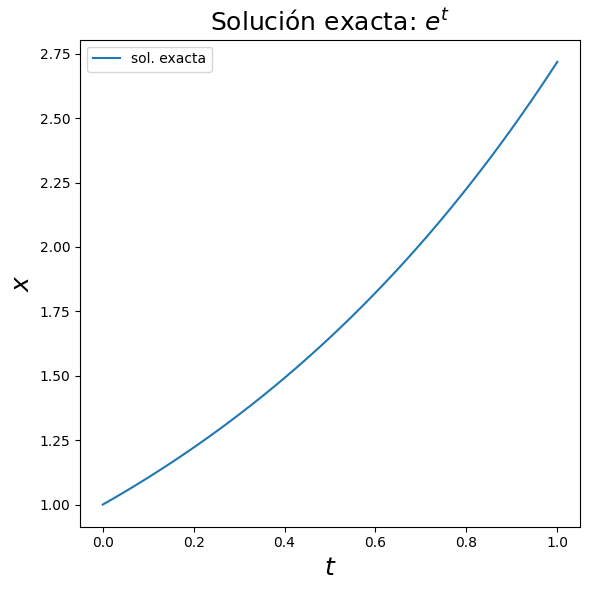

In [35]:
# Representación gráfica de la solución exacta
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
ax.plot(t_values, x_values, label="sol. exacta")
ax.set_title(r"Solución exacta: $%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()

fig.tight_layout()

## 4. Métodos de Euler 🌉

El método de Euler explícito es el método más sencillo de aproximación numérica de soluciones de PVI. En él, calculamos sucesiones de valores
$$
t_{n+1} = t_n + h, \qquad x_{n+1} = x_n + h f(t_n,x_n).
$$

In [36]:
def euler_explicito(f, a, b, mu, N):
    """
    Método de Euler explícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    for n in range(N):
        x[n + 1] = x[n] + h * f(t[n], x[n])
    return t, x

A continuación aplicamos este algoritmo con un valor concreto de $N$ y la función $f(t,x)=x$ que define nuestra EDO desde un primer momento, así como la condición inicial $x(a)=1$.

In [43]:
N = 10
t_values, x_values_Eulerexpl = euler_explicito(f,a,b,mu,N)

In [44]:
print(x_values_Eulerexpl)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246]


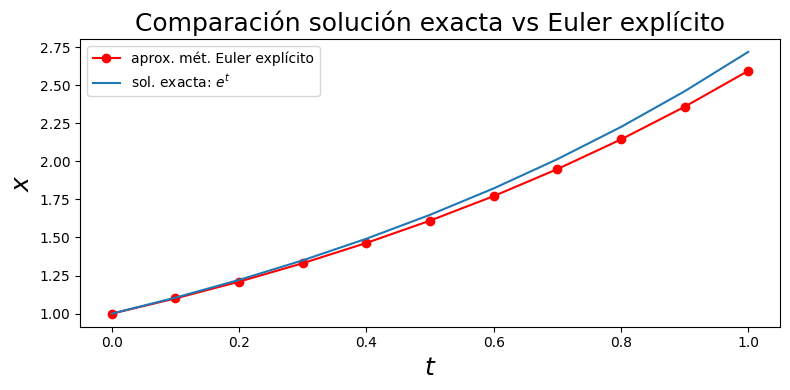

In [45]:
# Dibujamos y comparamos con la solución exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_Eulerexpl, 'ro-',label = "aprox. mét. Euler explícito")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparación solución exacta vs Euler explícito", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Por su parte, en el método de Euler implícito, es necesario resolver una ecuación para obtener el nuevo valor:
$$x_{n+1} = x_n + h f(t_{n+1},x_{n+1}).$$

In [63]:
from scipy.optimize import fsolve

def euler_implicito(f, a, b, mu, N):
    """
    Método de Euler explícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        # x[n + 1] = np.float64(sp.solve(x[n]+h*f(t[n+1],x1)-x1,x1)[0])
        x[n + 1] = fsolve(lambda x1: x[n] + h * f(t[n + 1], x1) - x1, x[n])[0]
    return t, x

In [64]:
N = 10
t_values, x_values_Eulerimpl = euler_implicito(f,a,b,mu,N)

In [65]:
print(x_values_Eulerimpl)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.11111111 1.2345679  1.37174211 1.5241579  1.69350878
 1.88167642 2.09075158 2.32305731 2.58117479 2.86797199]


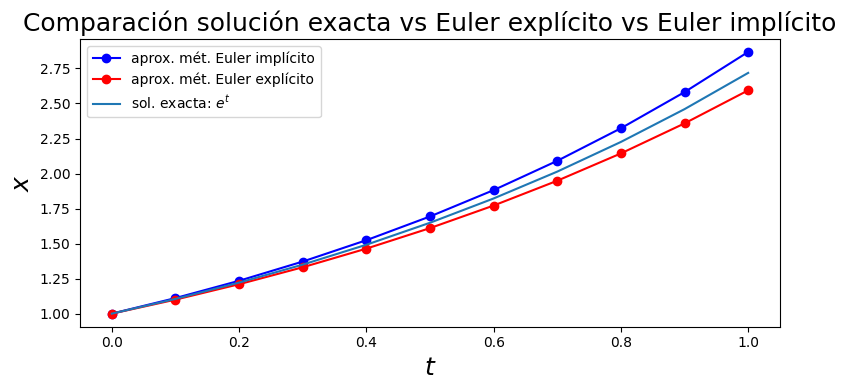

In [66]:
# Dibujamos y comparamos con la solución exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_Eulerimpl, 'bo-',label = "aprox. mét. Euler implícito")
ax.plot(t_values, x_values_Eulerexpl, 'ro-',label = "aprox. mét. Euler explícito")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparación solución exacta vs Euler explícito vs Euler implícito", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

> **Ejercicio 1:** Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional.

> **Ejercicio 2:** A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

Habría una posibilidad de intentar estimar el tiempo de CPU empleado 

In [50]:
import timeit

In [51]:
N = 10
%time
_, _ = euler_explicito(f,a,b,mu,N)

CPU times: total: 0 ns
Wall time: 0 ns


In [52]:
%%timeit
_, _ = euler_explicito(f,a,b,mu,N)

20.9 μs ± 570 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [53]:
%time
_, _ = euler_implicito(f,a,b,mu,N)

CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
%%timeit
_, _ = euler_implicito(f,a,b,mu,N)

164 ms ± 991 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Al usar `%time` el intérprete de Python nos intenta devolver el tiempo empleado en la ejecución de dicho comando (o linea de comandos), pero esto suele depender muchas veces de la carga puntual de la CPU en ese justo momento de la ejecución; por ese motivo se suele preferir el uso del comando mágico `%%timeit` que lo que hace más bien es realizar una tanda de ejecuciones repetitivas de dicha linea o bloque de comandos, tantas veces como sea necesario para obtener un valor estimado promedio, que es el que nos devuelve seguidamente. Habrá que tener en cuenta en todo caso, tanto las unidades de medida del tiempo que nos devuelva (ya sea en  nano- ($10^{-9}$ s), micro- ($10^{-6}$ s), mili-segundos ($10^{-3}$ s), etc), como el número de veces que se ha llevado a cabo la tanda de repeticiones, que puede oscilar entre unos cientos o miles, hasta a veces un millón, para poder comparar finalmente de una manera realista la rapidez de ejecución de cierto trozo de código.

## 5. Métodos de Taylor 🪩

Como es bien sabido, los métodos de Taylor se basan en un adecuado desarrollo en serie de Taylor de la propia función incógnita $x(t)$, suponiendo que resulta ser suficientemente derivable, y que sus derivadas sucesivas se pueden obtener a partir de la función $f$ que determina la EDO que satisface: $$x'(t)=f(t,x(t)),\; t\in[a,b]$$

Así pues, si suponemos que $x\in\mathcal{C}^p$ y que podemos realizar un desarrollo en serie como el que sigue:
$$x(t+h)\approx x(t)+h\, x'(t)+\frac{h^2}{2}\, x''(t)+\ldots+\frac{h^p}{p!}\, x^{(p)}(t)\\ \equiv x(t)+h\, F_1(t,x(t))+\frac{h^2}{2}\, F_2(t,x(t))+\ldots+\frac{h^p}{p!}\, F_p(t,x(t))$$

pues justamente el conocido método de Euler explícito, visto anteriormente, correspondería con el desarrollo de Taylor correspondiente al caso $p=1$, definiendo por ejemplo $F_1(t,x)\equiv f(t,x)$. 

Así pues vamos por ejemplo a centrarnos en desarrollar por ejemplo, el siguiente caso $p=2$, y los demás casos $p>2$ se harían de la misma manera, sólo que conllevarían la realización de más cálculos del mismo tipo.

**Caso $p=2$:**
Aquí de lo que se trataría es de aprovechar la expresión de la EDO que relaciona la derivada primera de $x(t)$ con $f(t,x(t))$, y realizar la derivada segunda de acuerdo con el siguiente desarrollo (asumiendo que $f\equiv f(t,x)$):

$$x''(t)=\frac{d}{dt}x'(t)=\frac{d}{dt}(f(t,x(t)))=\frac{df}{dt}(t,x(t))+\frac{df}{dx}(t,x(t))\,x'(t) \\= \frac{df}{dt}(t,x(t))+\frac{df}{dx}(t,x(t))\,f(t,x(t)) \equiv F_2(t,x(t))$$

de manera que finalmente nuestro métodos de Taylor de orden $p=2$ quedaría como sigue:

$$x(t+h)\approx x(t)+h\,F_1(t,x(t)) +\frac{h^2}{2}\, F_2(t,x(t))$$

con $F_1(t,x)\equiv f(t,x)$  y $F_2(t,x)\equiv \frac{df}{dt}(t,x)+\frac{df}{dx}(t,x)\,f(t,x)$.

Vamos pues a intentar implementar este método de Taylor de orden $p=2$ aprovechando las capacidadesd de cálculo simbólico que también nos proporciona el módulo de cálculo simbólico de Python, `SymPy`.

Recordemos que `x` la definimos anteriormente como función, lo cual puede provocar error a la hora de derivar `f` respecto de `x`.

In [67]:
type(x)

sympy.core.function.UndefinedFunction

In [69]:
# sp.diff(f(t, x), x) # Error

Utilizaremos en su lugar una nueva variable, `z`.

In [70]:
z = sp.Symbol('z')
f(t,z)

z

In [71]:
f(t,z), sp.diff(f(t,z),t), sp.diff(f(t,z),z)

(z, 0, 1)

In [72]:
def F1(t,z):
    return f(t,z)

def F2(t,z):
    return sp.diff(f(t,z),t) + sp.diff(f(t,z),z)*f(t,z)

In [73]:
F1(t,z), F2(t,z)

(z, z)

In [74]:
def taylor_2(f, a, b, mu, N):
    """
    Método de Taylor de orden 2 para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = mu
    t, z = sp.symbols('t z')
    F1 = lambda t,z: f(t,z)
    F2 = lambda t,z: sp.diff(f(t,z),t) + sp.diff(f(t,z),z)*f(t,z)
    for n in range(N):
        x_values[n + 1] = np.float64(x_values[n] + h * F1(t_values[n], x_values[n]) + \
                                     (h**2 / 2) * F2(t,z).subs({t: t_values[n], z: x_values[n]}))
    return t_values, x_values

In [97]:
N = 10
t_values, x_values_Taylor2 = taylor_2(f,a,b,mu,N)

In [98]:
print(x_values_Taylor2)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


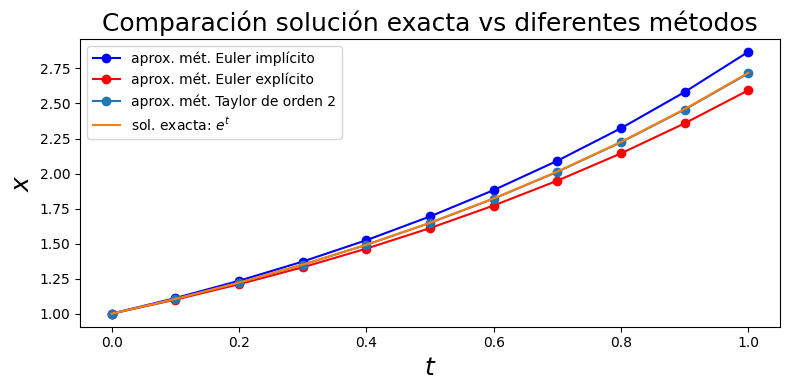

In [99]:
# Dibujamos y comparamos con la solución exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_Eulerimpl, 'bo-',label = "aprox. mét. Euler implícito")
ax.plot(t_values, x_values_Eulerexpl, 'ro-',label = "aprox. mét. Euler explícito")
ax.plot(t_values, x_values_Taylor2, 'o-',label = "aprox. mét. Taylor de orden 2")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparación solución exacta vs diferentes métodos", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Vemos que en este caso la aproximación por el método de Taylor de orden 2 es muy cercana a la solución exacta. Para hacernos una idea del error que estamos cometiendo, calcularemos el error cuadrático medio, esto es:
$$
ECM = \dfrac 1 {N+1} \sum_{n=0}^{N} (x(t_n) - x_n)^2, 
$$
donde $x(t)$ es la solución exacta y $x_n$ la sucesión de aproximaciones que calculamos con este método.

In [100]:
ECM_taylor2 = ((x_values_Taylor2 - sol_exacta_np(t_values))**2).mean()
ECM_taylor2

np.float64(4.32470120081979e-06)

Otra forma de aproximar el error es calcular el máximo error absoluto, es decir:
$$
MEA = \max_{n=0,\dots,N}|x(t_n)-x_n|,
$$
aunque es una medida poco representativa, pues una desviación en un único punto puede dar indicios de ser una mala aproximación cuando realmente puede no serlo.

In [102]:
MEA_taylor2 = np.max(np.abs(x_values_Taylor2 - sol_exacta_np(t_values)))
MEA_taylor2

np.float64(0.004200981850820629)

> **Ejercicio 3** A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

## 6. Métodos de Runge-Kutta ➿

Debido a la complejidad del desarrollo de las derivadas a partir de cierto orden, los métodos de Taylor no son muy utilizados. En su lugar, los métodos de Runge-Kutta (RK), son bastante populares.

En particular, vamos a ver el método de RK de 2 evaluaciones en esta práctica, que como sabemos admite dos parámetros $\alpha$ y $\beta$, cumpliendo $\alpha\beta=1/2$, de forma que
$$
x_{n+1} = x_n + h ((1-\alpha)K_1+\alpha K_2),
$$
donde $K_1 = f(t_n, x_n), K_2=f(t_n+\beta h, h\beta K_1)$.

In [87]:
def RK2(f, a, b, mu, N, alpha=0.5, beta=1):
    """
    Método de Runge-Kutta de orden 2 para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = mu
    for n in range(N):
        K1 = f(t_values[n], x_values[n])
        K2 = f(t_values[n] + beta * h, x_values[n] + beta * h * K1)
        x_values[n + 1] = x_values[n] + h * ((1-alpha)*K1 + alpha*K2)
    return t_values, x_values

In [88]:
N = 10
alpha, beta = 1, 1/2 # Euler mejorado o punto medio
t_values, x_values_rk2_pm = RK2(f,a,b,mu,N,alpha=alpha, beta=beta)

In [89]:
print(x_values_rk2_pm)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


In [93]:
N = 10
alpha, beta = 1/2, 1 # Euler modificado o Heun
t_values, x_values_rk2_H = RK2(f,a,b,mu,N,alpha=alpha, beta=beta)

In [94]:
print(x_values_rk2_H)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


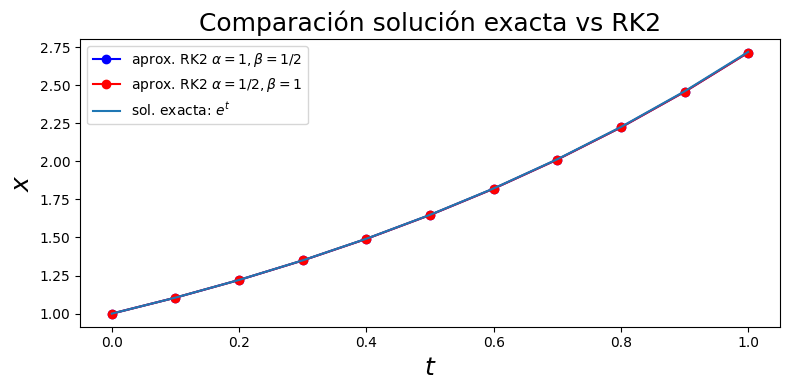

In [92]:
# Dibujamos y comparamos con la solución exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_rk2_pm, 'bo-',label = r"aprox. RK2 $\alpha=1,\beta=1/2$")
ax.plot(t_values, x_values_rk2_H, 'ro-',label = r"aprox. RK2 $\alpha=1/2,\beta=1$")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparación solución exacta vs RK2", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

In [95]:
ECM_rk2_pm = ((x_values_rk2_pm - sol_exacta_np(t_values))**2).mean()
ECM_rk2_H  = ((x_values_rk2_H  - sol_exacta_np(t_values))**2).mean()
ECM_rk2_pm, ECM_rk2_H

(np.float64(4.324701200821029e-06), np.float64(4.324701200821029e-06))

In [103]:
MEA_rk2_pm = np.max(np.abs(x_values_rk2_pm - sol_exacta_np(t_values)))
MEA_rk2_H  = np.max(np.abs(x_values_rk2_H  - sol_exacta_np(t_values)))
MEA_rk2_pm, MEA_rk2_H

(np.float64(0.004200981850821073), np.float64(0.004200981850821073))

Por su parte, en el método de Runge-Kutta de 4 evaluaciones, también conocido como método de Runge-Kuta clásico, la sucesión se calcula mediante
$$
x_{n+1} = x_n + \frac h 6 (K_1+2K_2+2K_3+K_4),
$$
donde $K_1=f(t_n,x_n)$, $K_2 = f(t_n+\frac h 2, x_n + \frac h 2 K_1)$, $K_3 = f(t_n+\frac h 2, x_n + \frac h 2 K_2)$ y $K_4 = f(t_n+h, x_n + h K_3)$.

> **Ejercicio 4:** Programe el método de Runge-Kutta de 4 evaluaciones y grafique la sucesión de aproximaciones y calcule el error cuadrático medio y el máximo error absoluto con respecto a la solución exacta.

> **Ejercicio 5 (Ejercicio final de las diapositivas):** Se pretende aproximar la solución del PVI:
> $$
> \left\{\begin{array}{rcl}
> x'(t) &=& \dfrac{t-x(t)} 2 \\
> x(0) &=& 1
> \end{array}\right..
> $$
> en $[0,3]$
> 1. Usa el método de Runge-Kutta de 2 evaluaciones con $\alpha= 3/4$ y $\beta=2/3$ para $h = 1$, $h = 1/2$, $h = 1/4$ y $h = 1/8$ y compara los resultados obtenidos.
> 2. Repite el apartado anterior usando Runge-Kutta clásico.
> 
> Nota: La solución exacta es $x(t) = 3 e^{-t/2} + t -2$.